# Multi-Qubit Gates

We'll look at the CNOT, CCNOT (Toffoli), and MCT gates in this notebook. 

We do some necessary imports first.

In [1]:
import numpy as np
from qiskit import *
from qiskit.providers.aer import StatevectorSimulator
from math import sqrt
# We need this to embed the image produced into the notebook
%matplotlib inline

## 1. CNOT gate

The [CNOT gate](https://en.wikipedia.org/wiki/Quantum_logic_gate) flips the second qubit (the most significant one) if the first qubit is $\left|1\right\rangle$. Accordingly, the first qubit is also called the Control Qubit, and the second qubit called the Target Qubit.  

In matrix form, the CNOT gate is
$$
\text{CNOT} = 
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 
\end{bmatrix}.
$$

In Qiskit, its corresponding function is `QuantumCircuit.cx(qc, qt)`. Note that the first parameter is the Control Qubit, and the last parameter is the Target Qubit. 

### Example: Boolean case 
We create a small circuit with the CNOT gate to try its Boolean case first:

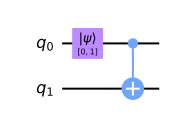

In [2]:
# If the QuantumCircuit() function only has one parameter, 
# it means the number of input qubits.
qc = QuantumCircuit(2)
# Create an initial state of |1>
initial_state = [0, 1]
# Initialise qubit 0 with this state
qc.initialize(initial_state, 0)
# The cx() function is used to apply a CNOT-gate to two qubits.
# Its parameters indicate q0 is the Control Qubit, and q1 is the Target Qubit.
qc.cx(0, 1)
# Draw the circuit
qc.draw()

To see the result of this circuit, we use the `StatevectorSimulator` to run it. Recall that the `StatevectorSimulator` maintains the states of qubits in every step and allows us to examine them using the `get_statevector()` function.

In [3]:
# Alternatively: simulator = Aer.get_backend('statevector_simulator')
simulator = StatevectorSimulator()

# Print zero instead of tiny floating point values
np.set_printoptions(suppress=True)

job = execute(qc, backend=simulator, shots=1)
v = job.result().get_statevector()
v

array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

Since the input qubits are $q_0=|1\rangle$ and $q_1=|0\rangle$, and the output qubits should be $q_0=|1\rangle$ and $q_1=|1\rangle$. Thus, the joint state vector of the output qubits should be  
$\begin{bmatrix}0 \\ 0 \\ 0 \\ 1 \end{bmatrix}$, which was exactly given by the array above.

### Example: Entangling two qubits 
Here we try the example given in the Lecture 4 General Case Note 2 for entangling two qubits:

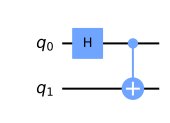

In [4]:
qc = QuantumCircuit(2)
# Apply Hadamard gate to qubit 0 
qc.h(0)
# Apply CNOT gate to qubits 0 and 1.
# NB: q0 is the Control Qubit, and q1 is the Target Qubit.
qc.cx(0, 1)
# Draw the circuit
qc.draw()

To see the result of this circuit, we use the `StatevectorSimulator` to run it.

In [5]:
# Alternatively: simulator = Aer.get_backend('statevector_simulator')
simulator = StatevectorSimulator()

# Print zero instead of tiny floating point values
np.set_printoptions(suppress=True)

job = execute(qc, backend=simulator, shots=1)
v = job.result().get_statevector()
v

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

As calculated in the lecture, the expected result should be the vector  
$\begin{bmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ 0 \\ \frac{1}{\sqrt{2}} \end{bmatrix}$, which was exactly given by the array above.

### Example: Entangling two qubits and then disentangling them 
Here we try the example given in the Lecture 4 General Case Note 3 for entangling two qubits first and then disentangling them:

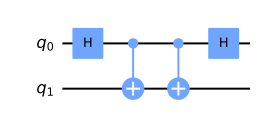

In [6]:
qc = QuantumCircuit(2)
# Entangling qubits 0 and 1 by H gate and CNOT gate 
qc.h(0)
qc.cx(0, 1)
# Apply the CNOT gate again to disentangle them
qc.cx(0, 1)
# Apply the H gate to qubit 0 to restore it to |0>
qc.h(0)
# Draw the circuit
qc.draw()

To see the result of this circuit, we use the `StatevectorSimulator` to run it.

In [7]:
# Alternatively: simulator = Aer.get_backend('statevector_simulator')
simulator = StatevectorSimulator()

# Print zero instead of tiny floating point values
np.set_printoptions(suppress=True)

job = execute(qc, backend=simulator, shots=1)
v = job.result().get_statevector()
v

array([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

Since we reversed the qubits to their initial states in the above circuit, the expected result should be:
$$
|0\rangle \otimes |0\rangle =
\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
$$
This was exactly given by the array above.

### Example: CNOT gate being its own inverse

We'll use the matrix multiplication by numpy package to verify this. Recall that
$$
\text{CNOT} = 
\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{bmatrix}.
$$




In [8]:
cnot = np.array([[1,0,0,0],
                 [0,0,0,1],
                 [0,0,1,0],
                 [0,1,0,0]])
product = np.dot(cnot, cnot)
product

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

This verifies that $\, \text{CNOT} \times \text{CNOT} = I$, so $\, \text{CNOT} \,$ is its own inverse.

## 2. Toffoli gate

The [Toffoli gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Toffoli_(CCNOT)_gate) flips the third qubit (the most significant one) if the first two qubits are both $|1\rangle$. Accordingly, the first two qubits are also called the Control Qubits, and the third qubit called the Target Qubit. It is an extension to the CNOT gate by adding one more Control Qubit. Thus, it is also called CCNOT gate. 

In matrix form, the Toffoli gate is
$$
\text{CCNOT} = 
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{bmatrix}.
$$

In Qiskit, its corresponding function is `QuantumCircuit.ccx(qc0, qc1, qt)`. Note that the first two parameters are the Control Qubits, and the last parameter is the Target Qubit.

### Example: Boolean case 
We create a small circuit with the CCNOT gate to try its Boolean case first:

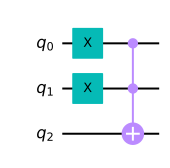

In [9]:
# If the QuantumCircuit() function only has one parameter, 
# it means the number of input qubits.
qc = QuantumCircuit(3)

# Changing qubits 0 and 1 to the state of |1>
qc.x(0)
qc.x(1)
# Or simply: qc.x([0,1])

# The ccx() function is used to apply a CCNOT-gate to 3 qubits.
# The first two parameters indicate Control Qubits, 
# and the last parameter the Target Qubit.
qc.ccx(0, 1, 2)
# Draw the circuit
qc.draw()

To see the result of this circuit, we use the `StatevectorSimulator` to run it. 

In [10]:
# Alternatively: simulator = Aer.get_backend('statevector_simulator')
simulator = StatevectorSimulator()

# Print zero instead of tiny floating point values
np.set_printoptions(suppress=True)

job = execute(qc, backend=simulator, shots=1)
v = job.result().get_statevector()
v

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

Since the input qubits are $q_0=|1\rangle$, $q_1=|1\rangle$, and $q_2=|0\rangle$, the output qubits should be $q_0=|1\rangle$, $q_1=|1\rangle$, $q_2=|1\rangle$. Thus, the joint state vector of the output qubits should be:
$$
\begin{bmatrix}0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}
$$
This was exactly given by the array above.

### Example: CCNOT gate being its own inverse

We'll use the matrix multiplication by numpy package to verify this. 

In [11]:
ccnot = np.array([[1,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0],
                  [0,0,0,0,0,0,0,1],
                  [0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,1,0],
                  [0,0,0,1,0,0,0,0]])
product = np.dot(ccnot, ccnot)
product

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

This verifies that $\, \text{CCNOT} \times \text{CCNOT} = I$, so $\, \text{CCNOT} \,$ is its own inverse.

## 3. MCT gate

The MCT gate supports an arbitrary number of control qubits. It flips the target qubit when all the control qubits are $|1\rangle$. 

In Qiskit, its corresponding function is `QuantumCircuit.mct(control-qubit-list, qt)`. Note that the first parameter gives the list of the Control Qubits, and the second parameter gives the Target Qubit.

We create a small circuit with the MCT gate to try its Boolean case:

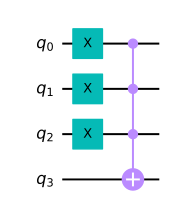

In [12]:
# If the QuantumCircuit() function only has one parameter, 
# it means the number of input qubits.
qc = QuantumCircuit(4)

# Changing qubits 0, 1, and 2 to the state of |1>
qc.x([0, 1, 2])

# Using qubits 0, 1, and 2 to control qubit 3
qc.mct([0, 1, 2], 3)
# Draw the circuit
qc.draw()

To see the result of this circuit, we use the `StatevectorSimulator` to run it. 

In [13]:
# Alternatively: simulator = Aer.get_backend('statevector_simulator')
simulator = StatevectorSimulator()

# Print zero instead of tiny floating point values
np.set_printoptions(suppress=True)

job = execute(qc, backend=simulator, shots=1)
v = job.result().get_statevector()
v

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

Since the input qubits are $q_0=q_1=q_2=|1\rangle$ and $q_3=|0\rangle$, the output qubits should be $q_0=q_1=q_2=q_3=|1\rangle$. Thus, the joint state vector of the output qubits should consists of 15 zero's and a single one:
$$
\begin{bmatrix}0 \\ 0 \\ 0 \\ \vdots \\ 0 \\ 1 \end{bmatrix}
$$
This was exactly given by the array above.